In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from predict import evaluate_classification

In [5]:
data = pd.read_csv("./data/nsl-kdd/Train_Data.csv")
test = pd.read_csv("./data/nsl-kdd/Test_Data.csv")

In [7]:
X_train = data.iloc[:,data.columns!='label']
y_train = data.iloc[:,data.columns=='label'] 

X_test = test.iloc[:,test.columns!='label']
y_test = test.iloc[:,test.columns=='label']

print(f"{X_train.shape}")
print(f"{y_train.shape}")
print(f"{X_test.shape}")
print(f"{y_test.shape}")

(113270, 41)
(113270, 1)
(17171, 41)
(17171, 1)


In [9]:
X_train.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       19     8        491          0     0   
1         0              2       40     8        146          0     0   
2         0              1       44     4          0          0     0   
3         0              1       22     8        232       8153     0   
4         0              1       22     8        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             150                  25   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             255                  26   
3               0       0    0  ...              30                 255   
4               0       0    0  ...             255                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  
0                      0.00  
1                      0.00  
2                      0.00  
3                      0.01  
4                      0.00  

[5 rows x 41 columns]

In [11]:
y_train.head()

label
0      1
1      1
2      0
3      1
4      1

Training time:  0.20038890838623047
Training Accuracy GaussianNB 65.82148847885583  Test Accuracy GaussianNB 61.77275639159048
Training Precesion GaussianNB 96.5648482482678  Test Precesion GaussianNB 77.00360391281963
Training Recall GaussianNB 44.08030530270406  Test Recall GaussianNB 46.20533415714139


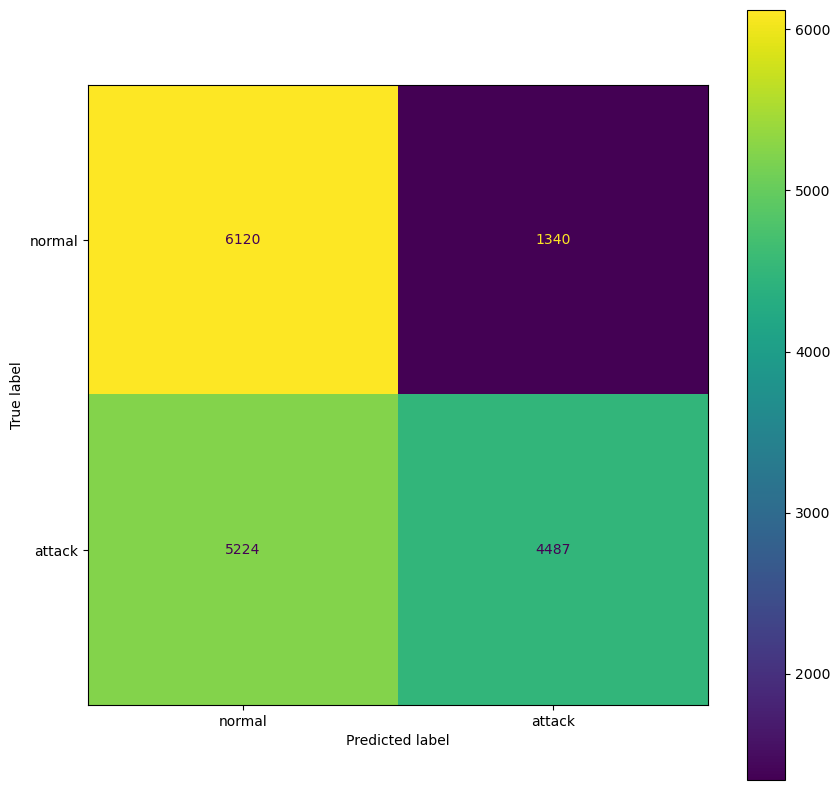

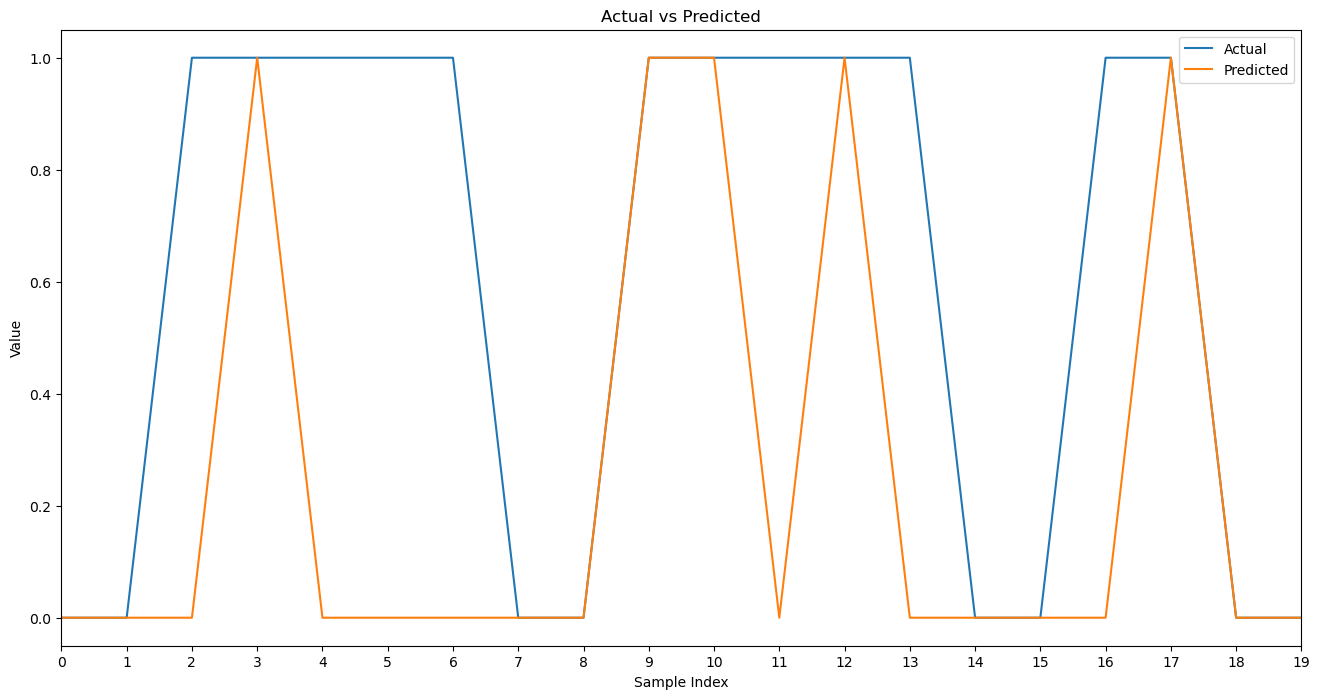

In [13]:
import time
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

start_time = time.time()
gnb = GaussianNB().fit(X_train, y_train)
end_time = time.time()
print("Training time: ", end_time-start_time)

evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

In [15]:
start_time = time.time()
# Compare predictions to truth labels to evaluate the model
y_preds = gnb.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.04486370086669922


In [17]:
acc1=accuracy_score(y_preds,y_test)
acc1

0.6177275639159048

In [19]:
gnb.score(X_train, y_train)

0.6582148847885583

In [21]:
gnb.score(X_test, y_test)

0.6177275639159048

In [23]:
import pickle
# Lưu mô hình RFE đã huấn luyện
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(gnb, file)

In [25]:
with open('naive_bayes_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    test1 = loaded_model.predict([[0,1,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,2,0.00,0.00,1.00,1.00,0.02,0.07,0.00,255,2,0.01,0.07,0.00,0.00,0.00,0.00,1.00,1.00]])

In [27]:
test1

array([0], dtype=int64)